In [ ]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Пути к файлам
parameters_file = 'Debugs/vio_parameters_comparison.csv'
fps_file = 'Debugs/vio_fps.json'
output_file = 'Debugs/vio_results_updated.csv'

In [ ]:
# Чтение параметров
df = pd.read_csv(parameters_file)
df['Max Iters'] = df['Max Iters'].fillna('None')

In [ ]:
# Чтение FPS из файла (или создание пустого словаря)
if os.path.exists(fps_file):
    with open(fps_file, 'r') as f:
        fps_data = json.load(f)
else:
    fps_data = {}

In [ ]:
flag = True
# Проход по параметрам и обработка FPS
for idx, row in df.iterrows():
    param_id = str(idx)  # Уникальный идентификатор для параметров

    # Проверяем, есть ли FPS для текущего набора
    if param_id in fps_data:
        print(f"Набор параметров #{idx + 1}: FPS уже существует ({fps_data[param_id]}).")
        continue

    # Если FPS отсутствует, запрашиваем у пользователя
    while flag:
        print(f"Набор параметров #{idx + 1}/{len(df)}")
        try:
            fps_values = input(f"Введите значения FPS для набора #{idx + 1} (через запятую, или нажмите Enter, чтобы пропустить): ")
            if not fps_values.strip():  # Пропуск набора
                print("Пропущено.")
                flag = False
                break

            fps_list = [float(fps) for fps in fps_values.split(',')]
            avg_fps = sum(fps_list) / len(fps_list)
            print(f"Среднее FPS: {avg_fps}")
            fps_data[param_id] = avg_fps
            break
        except ValueError:
            print("Некорректный ввод. Попробуйте ещё раз.")

Набор параметров #1: FPS уже существует (1.5999999999999999).
Набор параметров #2: FPS уже существует (2.5).
Набор параметров #3: FPS уже существует (1.55).
Набор параметров #4: FPS уже существует (2.62).
Набор параметров #5: FPS уже существует (4.933333333333334).
Набор параметров #6: FPS уже существует (4.114285714285715).
Набор параметров #7: FPS уже существует (4.0).
Набор параметров #8: FPS уже существует (5.133333333333334).
Набор параметров #9: FPS уже существует (3.3166666666666664).
Набор параметров #10: FPS уже существует (4.7).
Набор параметров #11: FPS уже существует (3.5).
Набор параметров #12: FPS уже существует (4.25).
Набор параметров #13: FPS уже существует (3.033333333333333).
Набор параметров #14: FPS уже существует (4.216666666666667).
Набор параметров #15: FPS уже существует (2.9166666666666665).
Набор параметров #16: FPS уже существует (4.266666666666667).
Набор параметров #17: FPS уже существует (1.6).
Набор параметров #18: FPS уже существует (3.04).
Набор параме

In [ ]:
# Сохраняем FPS в файл
with open(fps_file, 'w') as f:
    json.dump(fps_data, f, indent=4)
print(f"FPS данные сохранены в '{fps_file}'.")

FPS данные сохранены в 'Debugs/vio_fps.json'.


In [ ]:
# Добавляем FPS в DataFrame
df['Avg FPS'] = df.index.map(lambda idx: fps_data.get(str(idx), None))

# Сохраняем обновлённый файл
df.to_csv(output_file, index=False)
print(f"Результаты сохранены в '{output_file}'.")

Результаты сохранены в 'Debugs/vio_results_updated.csv'.


In [19]:
# Проверка наличия необходимых данных
if df[['Detection Threshold', 'RMSE', 'Top_k']].isnull().any().any():
    print("Данные содержат пропущенные значения! Проверьте входные данные.")
else:
    print("Данные готовы для визуализации.")

Данные готовы для визуализации.


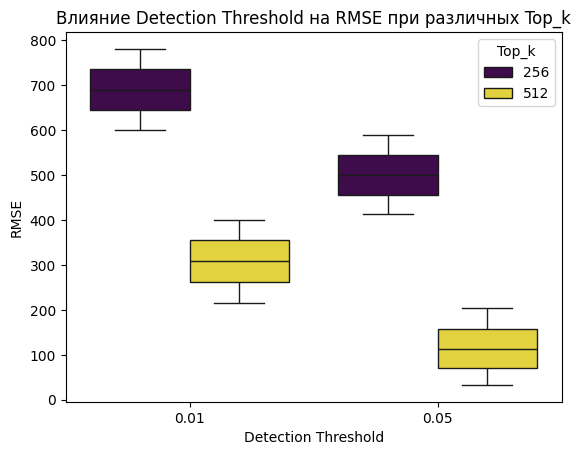

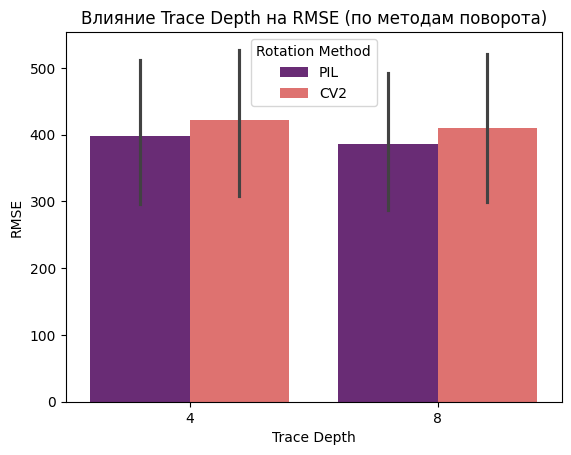

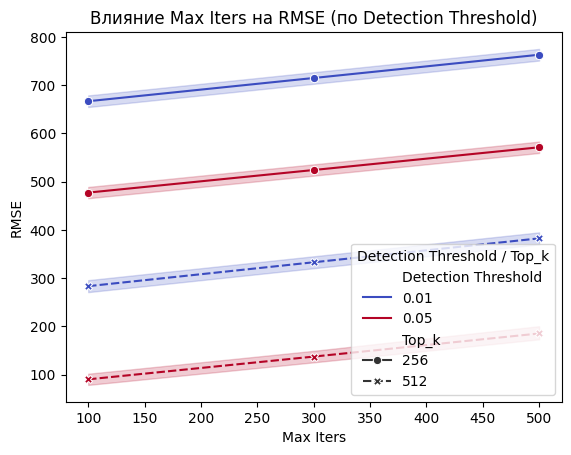

In [17]:
# График 1: Зависимость RMSE от Detection Threshold
sns.boxplot(data=df, x='Detection Threshold', y='RMSE', hue='Top_k', palette='viridis')
plt.title('Влияние Detection Threshold на RMSE при различных Top_k')
plt.xlabel('Detection Threshold')
plt.ylabel('RMSE')
plt.legend(title='Top_k')
plt.show()

# График 2: Влияние Trace Depth
sns.barplot(data=df, x='Trace depth', y='RMSE', hue='Rotation method', palette='magma')
plt.title('Влияние Trace Depth на RMSE (по методам поворота)')
plt.xlabel('Trace Depth')
plt.ylabel('RMSE')
plt.legend(title='Rotation Method')
plt.show()

# График 3: Влияние Max Iters
sns.lineplot(data=df[df['Max Iters'] != 'None'], x='Max Iters', y='RMSE', hue='Detection Threshold', style='Top_k', markers=True, palette='coolwarm')
plt.title('Влияние Max Iters на RMSE (по Detection Threshold)')
plt.xlabel('Max Iters')
plt.ylabel('RMSE')
plt.legend(title='Detection Threshold / Top_k')
plt.show()

In [21]:
# Поиск минимального значения RMSE
min_rmse = df['RMSE'].min()
threshold_rmse = min_rmse + 10 # в метрах

# Фильтрация конфигураций с RMSE ≤ минимальное значение RMSE + N метр
df_acceptable = df[df['RMSE'] <= threshold_rmse]

# Если есть конфигурации с допустимой точностью
if not df_acceptable.empty:
    best_acceptable = df_acceptable.loc[df_acceptable['Avg FPS'].idxmax()]
    print(f"Лучшая конфигурация с минимальным RMSE (добавлен {threshold_rmse - min_rmse} метр): \n{best_acceptable}")
else:
    best_overall = df.loc[df['Avg FPS'].idxmax()]
    print(f"Конфигурация с максимальным FPS (при RMSE > {threshold_rmse}): \n{best_overall}")

Лучшая конфигурация с минимальным RMSE (добавлен 10.0 метр): 
Top_k                        512
Detection Threshold         0.05
Max Iters                   None
Rotation method              PIL
Trace depth                    4
Max Distance           84.377986
Min Distance             4.49148
RMSE                      41.241
Avg FPS                      2.5
Name: 1, dtype: object
